In [1]:
%load_ext autoreload
%autoreload 2

# Com Trade Data Retrieval

## Setup

- api key
- find countries
- find HS codes

In [5]:
import pandas as pd
import requests
import comtradeapicall
api_key = "b1a3f42948df4538a17418bdfdc5574a"

import bizwiz
from bizwiz import trade_data 

path_manager = bizwiz.PathManager(
    data_dir = "../data/un_data/"
)

In [7]:
filepath = path_manager.get_data_file(filename='iso_country_codes.csv')
country_data = trade_data.load_country_data(filepath)
country_df = pd.DataFrame(data=country_data, columns=['name','alpha-2','iso'])
country_df = country_df[['name','iso']]

countries = [
    'sweden',
    'canada',
    'united states',
    'china',
    'india',
    'germany',
    'france',
]

# grab isos and coude data
country_info = {}
print(f"Obtaining data for all countries ...")
for country in countries:

    df = trade_data.search_country_iso(country, country_data)
    best_iso = df.sort_values(by=['score'], ascending=False).iloc[0]['iso']
    name = df.sort_values(by=['score'], ascending=False).iloc[0]['name']
    code = comtradeapicall.convertCountryIso3ToCode(best_iso)
    #split if multiple
    if ',' in code:
        codes = [int(v) for v in code.split(',')]
    else:
        codes = [int(code)]
    
    info = {
        'name' : name,
        'iso_country' : best_iso,
        'com_country' : codes,
    }
    country_info[best_iso]=info
print(f"Country Code Data:")
display(country_info)

Country Code Data:


{'SWE': {'name': 'Sweden', 'iso_country': 'SWE', 'com_country': [752]},
 'CAN': {'name': 'Canada', 'iso_country': 'CAN', 'com_country': [124]},
 'USA': {'name': 'United States of America',
  'iso_country': 'USA',
  'com_country': [840, 842, 841]},
 'CHN': {'name': 'China', 'iso_country': 'CHN', 'com_country': [156]},
 'IND': {'name': 'India', 'iso_country': 'IND', 'com_country': [699, 356]},
 'DEU': {'name': 'Germany', 'iso_country': 'DEU', 'com_country': [280, 276]},
 'FRA': {'name': 'France', 'iso_country': 'FRA', 'com_country': [251, 250]}}

In [8]:
chemical_keywords = [
    'sulphuric acid',
    'caustic',
    'sulphates',
    'potassium',
]
print(f"Grabbing HS code data ...")
hs_df = trade_data.get_hs_commodities_df(hs_versions=None)

for keyword in chemical_keywords:
    print(f"Searching for matches with : '{keyword}'")
    search_df = trade_data.fuzzy_search_df(
        query=keyword, 
        df=hs_df, 
        id_column='id', 
        search_column='text', 
        limit=5, 
        score_threshold=85
    )
    display(search_df)

Grabbing HS code data ...
Searching for matches with : 'sulphuric acid'


,id,text,score
0,2806,2806 - Hydrogen chloride (hydrochloric acid); ...,90
2,2807,2807 - Sulphuric acid; oleum,90
3,280700,280700 - Sulphuric acid; oleum,90
1,280620,280620 - Chlorosulphuric acid,90
40,291635,291635 - -- Esters of phenylacetic acid,86


Searching for matches with : 'caustic'


,id,text,score
0,281511,281511 - Sodium hydroxide (caustic soda); solid,90
1,281520,281520 - Potassium hydroxide (caustic potash),90


Searching for matches with : 'sulphates'


,id,text,score
0,253020,"253020 - Kieserite, epsomite (natural magnesiu...",90
1,2832,2832 - Sulphites; thiosulphates,90
2,283230,283230 - Thiosulphates,90
3,2833,2833 - Sulphates; alums; peroxosulphates (pers...,90
4,283311,283311 - Sodium sulphates; disodium sulphate,90


Searching for matches with : 'potassium'


,id,text,score
0,281520,281520 - Potassium hydroxide (caustic potash),90
1,281530,281530 - Peroxides of sodium or potassium,90
2,282620,282620 - - Fluorosilicates Of sodium or Of Pot...,90
3,282751,282751 - Bromides; of sodium or of potassium,90
4,283421,283421 - Nitrates; of potassium,90


In [10]:
chemicals = {
    'h2so4' : 2807, #H2SO4
    'naoh' : 281512, #NaOH
    'na2so4' : 283311, #Na2SO4
}
display(chemicals)
display(country_info)

{'h2so4': 2807, 'naoh': 281512, 'na2so4': 283311}

{'SWE': {'name': 'Sweden', 'iso_country': 'SWE', 'com_country': [752]},
 'CAN': {'name': 'Canada', 'iso_country': 'CAN', 'com_country': [124]},
 'USA': {'name': 'United States of America',
  'iso_country': 'USA',
  'com_country': [840, 842, 841]},
 'CHN': {'name': 'China', 'iso_country': 'CHN', 'com_country': [156]},
 'IND': {'name': 'India', 'iso_country': 'IND', 'com_country': [699, 356]},
 'DEU': {'name': 'Germany', 'iso_country': 'DEU', 'com_country': [280, 276]},
 'FRA': {'name': 'France', 'iso_country': 'FRA', 'com_country': [251, 250]}}

Gathering data for 'h2so4' - HS: 2807
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
Gathering data for 'naoh' - HS: 281512
- 'SWE' : Sweden
-- querying available data
-- querying imp

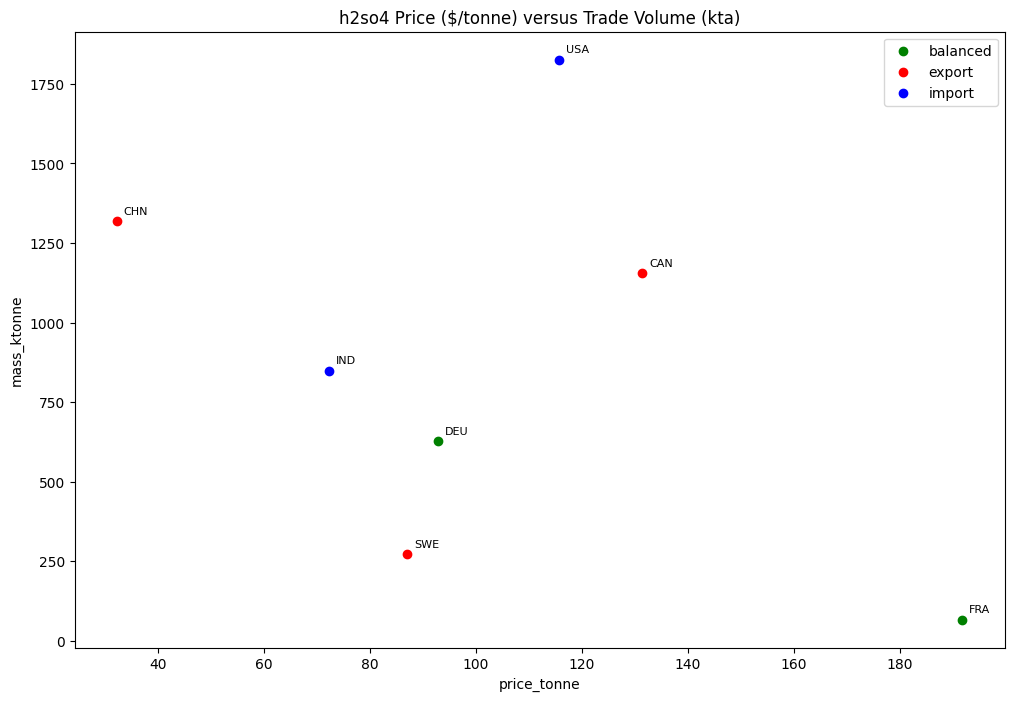

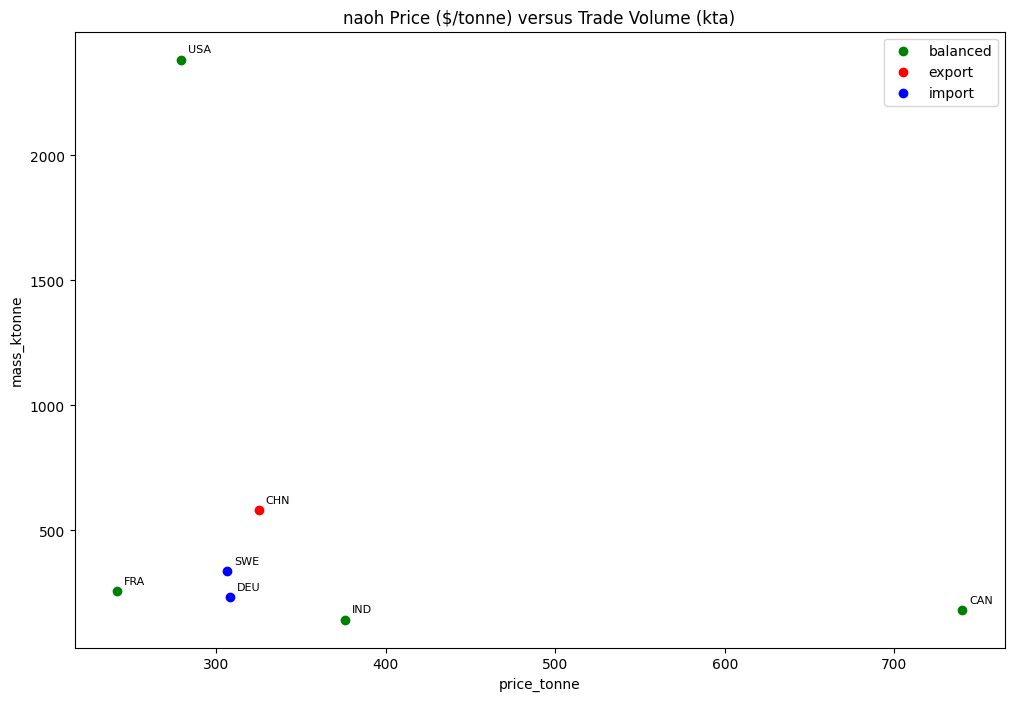

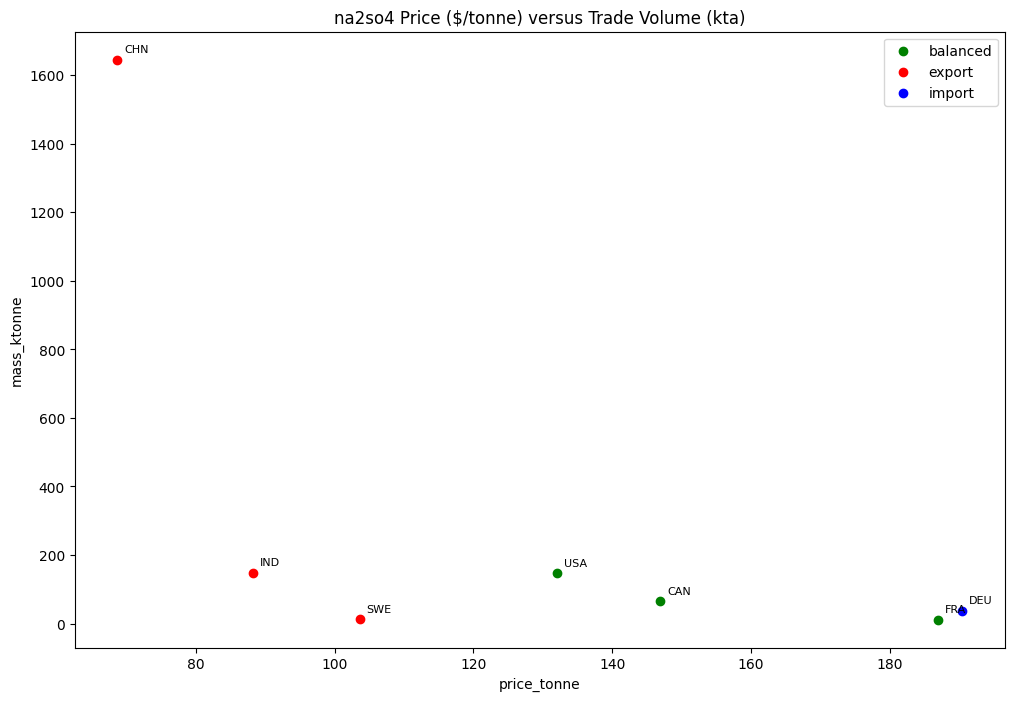

In [63]:
import copy
year = 2024
dataset = {}
for chemical, hs_code in chemicals.items():
    print(f"Gathering data for '{chemical}' - HS: {hs_code}")
    country_data = {}
    for country, info in country_info.items():
        print(f"- '{country}' : {info['name']}")
        try:
            data = {}
            
            com_country = info['com_country']
    
            #query
            print(f"-- querying available data")
            available_periods = trade_data.get_available_periods(com_country, hs_code, year, api_key)
            print(f"-- querying import data")
            import_raw_df = trade_data.get_trade_data(com_country, hs_code,periods=available_periods, api_key=api_key, kind='import')
            print(f"-- querying export data")
            export_raw_df = trade_data.get_trade_data(com_country, hs_code,periods=available_periods, api_key=api_key, kind='export')
    
            #process
            if import_raw_df.shape[0]>0:
                import_df = trade_data.process_trade_data(import_raw_df)
                import_df = trade_data.remove_unkown_partners(import_df, country_df)
            else:
                import_df = pd.DataFrame(columns=['value','mass'])
                
            if export_raw_df.shape[0]>0:
                export_df = trade_data.process_trade_data(export_raw_df)
                export_df = trade_data.remove_unkown_partners(export_df, country_df)
            else:
                export_df = pd.DataFrame(columns=['value','mass'])
            metrics = trade_data.get_trade_metrics(import_df, export_df)
            
            #data
            # bins=20
            # import_df.hist('price',bins=bins, figsize=(4,2))
            # export_df.hist('price',bins=bins, figsize=(4,2))
    
            data['available_periods'] = available_periods
            data['import_df'] = import_df.copy()
            data['export_df'] = export_df.copy()
            data['metrics'] = metrics

            country_data[country] = data
            print(f"-- completed data extraction")
        except Exception as e:
            print(f"-- failed due to :{e}")
    dataset[chemical] = copy.deepcopy(country_data)
print(f"Completed Data collection") 


columns = ['price','kind','iso','total_mass']
for chemical, country_data in dataset.items():
    results = []
    for country, data in country_data.items():
        metrics = data['metrics']
        # print(f"{country} - {metrics['price_total']:0.2f} $/kg, {metrics['kind']}")
        results.append([
            metrics['price_total'],
            metrics['kind'],
            country,
            metrics['mass_total']
        ])
    plot_df = pd.DataFrame(data=results, columns=columns)
    plot_df['price_tonne'] = plot_df['price']*1000
    plot_df['mass_ktonne'] = plot_df['total_mass']/1000/1000
    data_dir = path_manager.data_dir
    filename = data_dir / f"{chemical}_{year}_trade_data.csv"
    plot_df.to_csv(filename, index=False)
    fig = trade_data.get_annotated_scatter(
        df=plot_df, 
        x_col='price_tonne', 
        y_col='mass_ktonne', 
        color_col='kind', 
        key_col='iso', 
        title=f"{chemical} Price ($/tonne) versus Trade Volume (kta)"
    )
    display(fig)

Gathering data for 'h2so4' - HS: 2807
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
Gathering data for 'naoh' - HS: 281512
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
Gathering data for 'na2so4' - HS: 283311
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
Completed Data collection


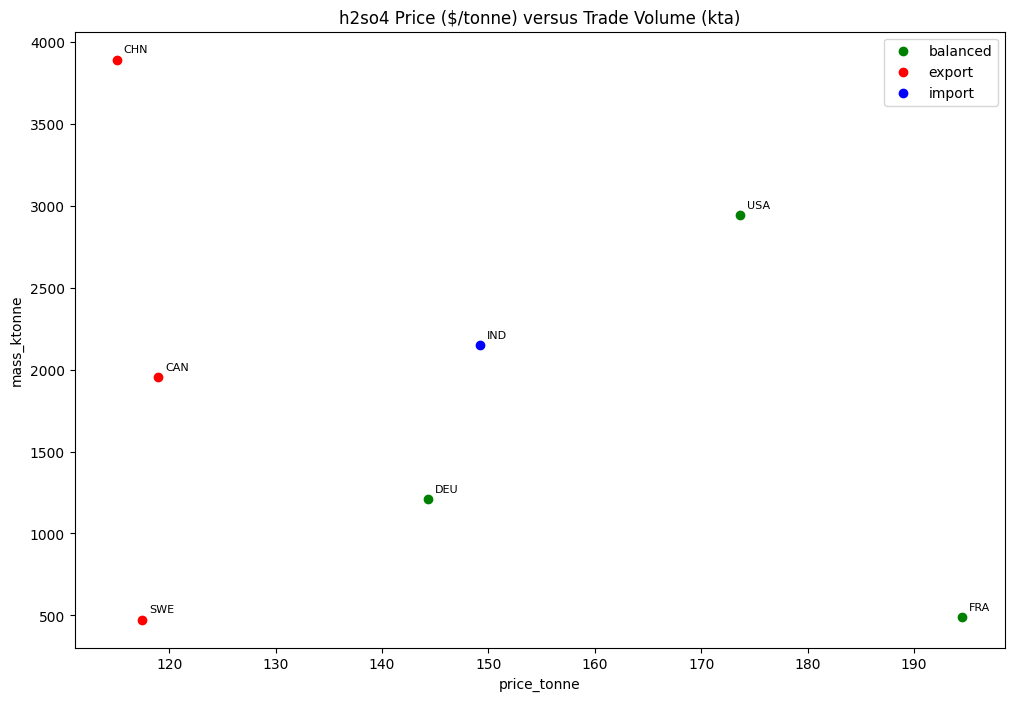

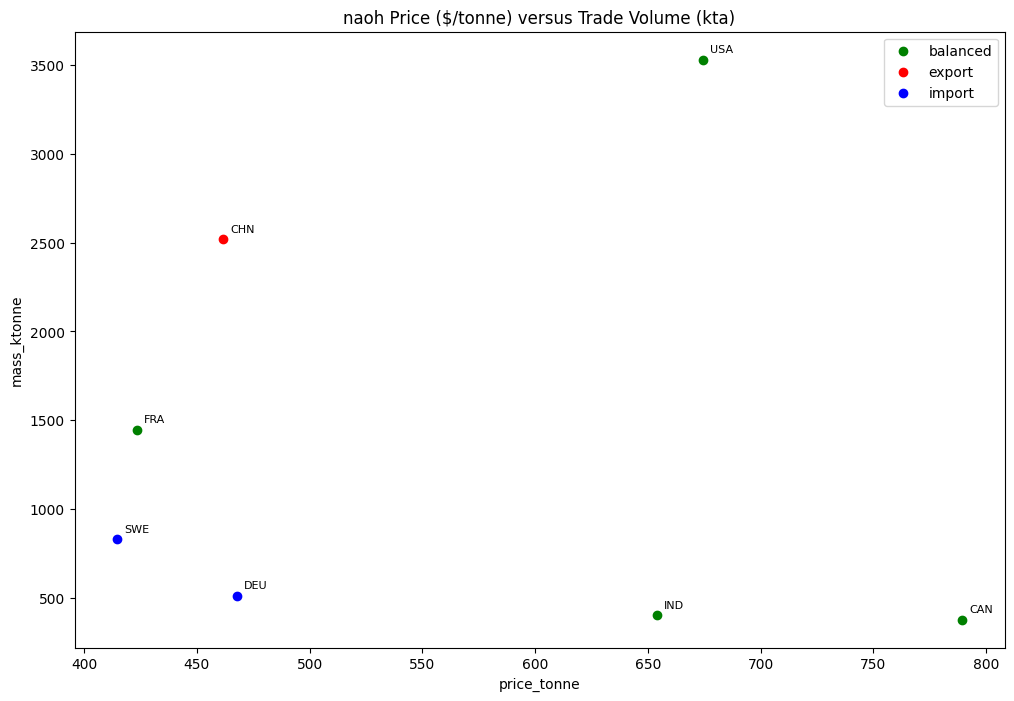

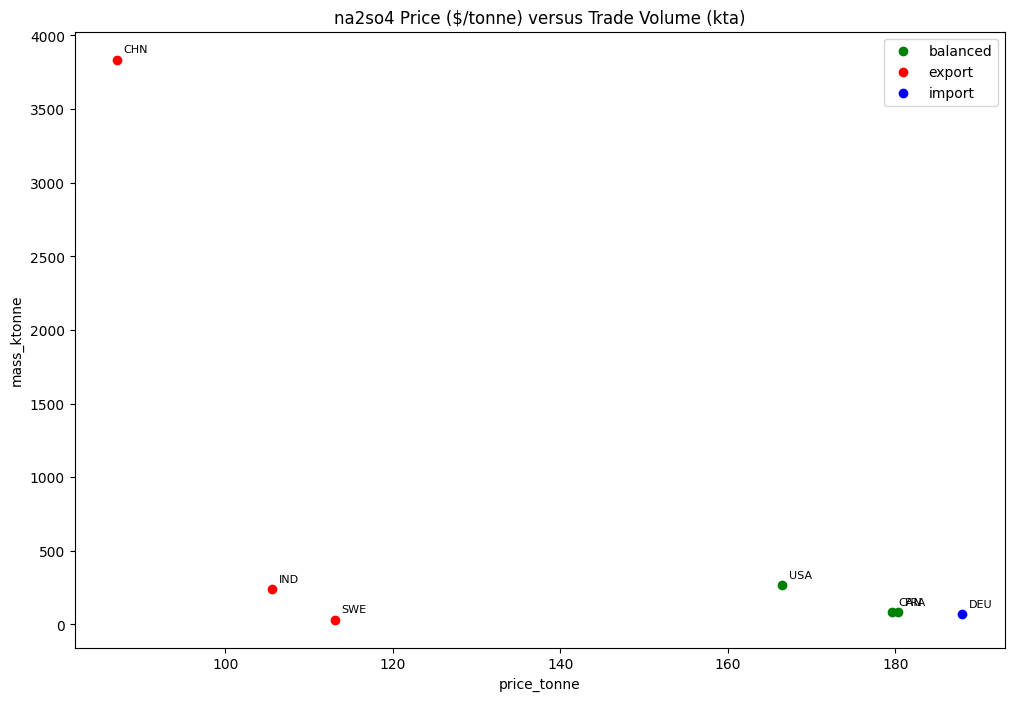

In [64]:
import copy
year = 2022
dataset = {}
for chemical, hs_code in chemicals.items():
    print(f"Gathering data for '{chemical}' - HS: {hs_code}")
    country_data = {}
    for country, info in country_info.items():
        print(f"- '{country}' : {info['name']}")
        try:
            data = {}
            
            com_country = info['com_country']
    
            #query
            print(f"-- querying available data")
            available_periods = trade_data.get_available_periods(com_country, hs_code, year, api_key)
            print(f"-- querying import data")
            import_raw_df = trade_data.get_trade_data(com_country, hs_code,periods=available_periods, api_key=api_key, kind='import')
            print(f"-- querying export data")
            export_raw_df = trade_data.get_trade_data(com_country, hs_code,periods=available_periods, api_key=api_key, kind='export')
    
            #process
            if import_raw_df.shape[0]>0:
                import_df = trade_data.process_trade_data(import_raw_df)
                import_df = trade_data.remove_unkown_partners(import_df, country_df)
            else:
                import_df = pd.DataFrame(columns=['value','mass'])
                
            if export_raw_df.shape[0]>0:
                export_df = trade_data.process_trade_data(export_raw_df)
                export_df = trade_data.remove_unkown_partners(export_df, country_df)
            else:
                export_df = pd.DataFrame(columns=['value','mass'])
            metrics = trade_data.get_trade_metrics(import_df, export_df)
            
            #data
            # bins=20
            # import_df.hist('price',bins=bins, figsize=(4,2))
            # export_df.hist('price',bins=bins, figsize=(4,2))
    
            data['available_periods'] = available_periods
            data['import_df'] = import_df.copy()
            data['export_df'] = export_df.copy()
            data['metrics'] = metrics

            country_data[country] = data
            print(f"-- completed data extraction")
        except Exception as e:
            print(f"-- failed due to :{e}")
    dataset[chemical] = copy.deepcopy(country_data)
print(f"Completed Data collection") 


columns = ['price','kind','iso','total_mass']
for chemical, country_data in dataset.items():
    results = []
    for country, data in country_data.items():
        metrics = data['metrics']
        # print(f"{country} - {metrics['price_total']:0.2f} $/kg, {metrics['kind']}")
        results.append([
            metrics['price_total'],
            metrics['kind'],
            country,
            metrics['mass_total']
        ])
    plot_df = pd.DataFrame(data=results, columns=columns)
    plot_df['price_tonne'] = plot_df['price']*1000
    plot_df['mass_ktonne'] = plot_df['total_mass']/1000/1000
    data_dir = path_manager.data_dir
    filename = data_dir / f"{chemical}_{year}_trade_data.csv"
    plot_df.to_csv(filename, index=False)
    fig = trade_data.get_annotated_scatter(
        df=plot_df, 
        x_col='price_tonne', 
        y_col='mass_ktonne', 
        color_col='kind', 
        key_col='iso', 
        title=f"{chemical} Price ($/tonne) versus Trade Volume (kta)"
    )
    display(fig)

Gathering data for 'h2so4' - HS: 2807
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
Gathering data for 'naoh' - HS: 281512
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
Gathering data for 'na2so4' - HS: 283311
- 'SWE' : Sweden
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'CAN' : Canada
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'USA' : United States of America
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'CHN' : China
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'IND' : India
-- querying available data
-- querying import data
-- querying export data
-- completed data extraction
- 'DEU' : Germany
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
- 'FRA' : France
-- querying available data
-- querying import data
-- querying export data


/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['iso'] = processed_df['reporterISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_df['partner'] = processed_df['partnerISO']
/home/nicholasgrundl/projects/bizwiz/src/bizwiz/trade_data.py:253: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

-- completed data extraction
Completed Data collection


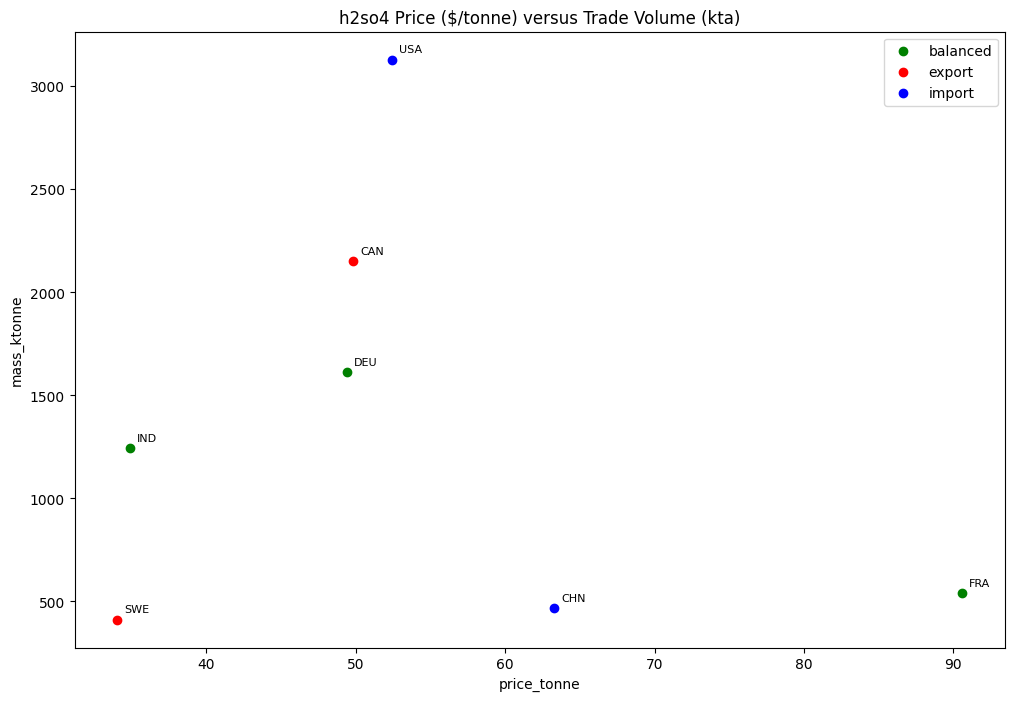

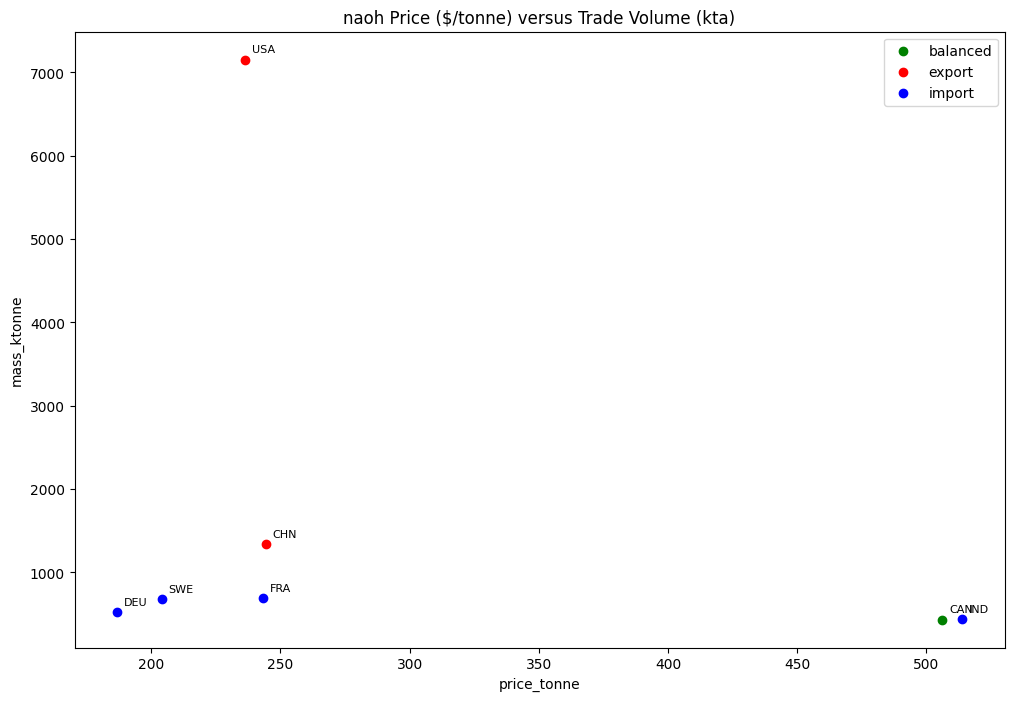

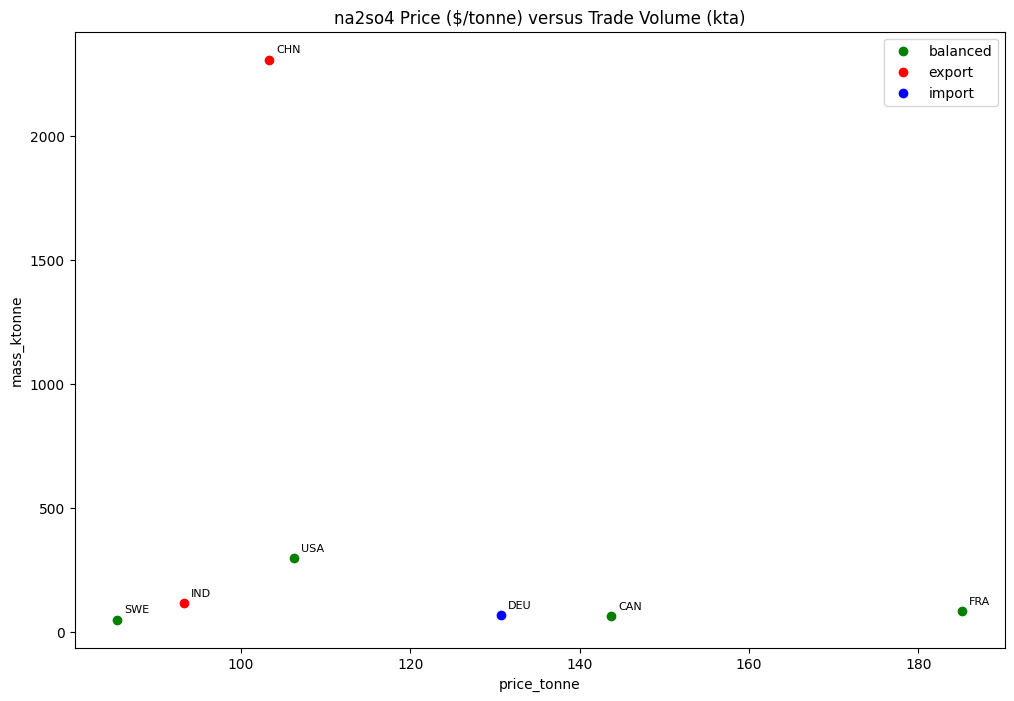

In [65]:
import copy
year = 2017
dataset = {}
for chemical, hs_code in chemicals.items():
    print(f"Gathering data for '{chemical}' - HS: {hs_code}")
    country_data = {}
    for country, info in country_info.items():
        print(f"- '{country}' : {info['name']}")
        try:
            data = {}
            
            com_country = info['com_country']
    
            #query
            print(f"-- querying available data")
            available_periods = trade_data.get_available_periods(com_country, hs_code, year, api_key)
            print(f"-- querying import data")
            import_raw_df = trade_data.get_trade_data(com_country, hs_code,periods=available_periods, api_key=api_key, kind='import')
            print(f"-- querying export data")
            export_raw_df = trade_data.get_trade_data(com_country, hs_code,periods=available_periods, api_key=api_key, kind='export')
    
            #process
            if import_raw_df.shape[0]>0:
                import_df = trade_data.process_trade_data(import_raw_df)
                import_df = trade_data.remove_unkown_partners(import_df, country_df)
            else:
                import_df = pd.DataFrame(columns=['value','mass'])
                
            if export_raw_df.shape[0]>0:
                export_df = trade_data.process_trade_data(export_raw_df)
                export_df = trade_data.remove_unkown_partners(export_df, country_df)
            else:
                export_df = pd.DataFrame(columns=['value','mass'])
            metrics = trade_data.get_trade_metrics(import_df, export_df)
            
            #data
            # bins=20
            # import_df.hist('price',bins=bins, figsize=(4,2))
            # export_df.hist('price',bins=bins, figsize=(4,2))
    
            data['available_periods'] = available_periods
            data['import_df'] = import_df.copy()
            data['export_df'] = export_df.copy()
            data['metrics'] = metrics

            country_data[country] = data
            print(f"-- completed data extraction")
        except Exception as e:
            print(f"-- failed due to :{e}")
    dataset[chemical] = copy.deepcopy(country_data)
print(f"Completed Data collection") 


columns = ['price','kind','iso','total_mass']
for chemical, country_data in dataset.items():
    results = []
    for country, data in country_data.items():
        metrics = data['metrics']
        # print(f"{country} - {metrics['price_total']:0.2f} $/kg, {metrics['kind']}")
        results.append([
            metrics['price_total'],
            metrics['kind'],
            country,
            metrics['mass_total']
        ])
    plot_df = pd.DataFrame(data=results, columns=columns)
    plot_df['price_tonne'] = plot_df['price']*1000
    plot_df['mass_ktonne'] = plot_df['total_mass']/1000/1000
    data_dir = path_manager.data_dir
    filename = data_dir / f"{chemical}_{year}_trade_data.csv"
    plot_df.to_csv(filename, index=False)
    fig = trade_data.get_annotated_scatter(
        df=plot_df, 
        x_col='price_tonne', 
        y_col='mass_ktonne', 
        color_col='kind', 
        key_col='iso', 
        title=f"{chemical} Price ($/tonne) versus Trade Volume (kta)"
    )
    display(fig)

# Given a country and a HSCode get import data

1. get trade data
inputs
- choose a year
- create periods, split mod 6
- import or export

outputs
- raw data for the query

2. clean data
- standardize units?
- compute price per qty column
- add material name
- add country ISO?
- drop unused columns

3. compute stats
- total import volume
- total export volume
- total volume
- total import value
- total export value
- total value
- total price = total value/ total volume
- kind = 'import','export','-' balanced
    - >90% of trade to one or other direction
- premium = price *(1+premium_frac)
- transport_distance = 100 km (assumption)
- transport price = 0.15 $/t*km
- transport_value = transport*transport_distance

## Find a country code

We will first search ISO country codes

after finding a ISO code we will convert it to a comtrade data format

## Find Data Availability

## Find commodity codes

# Obtain historical prices for a country and time period

In [252]:
# Query info
reporter_code = '124' #country
available_periods = '202401,202402,202403,202404,202405,202406'
hs_code = '2807'
flow = 'X' # 'M' for Import 'X' for Export

df = comtradeapicall.getFinalData(
    subscription_key=api_key, 
    typeCode='C', freqCode='M', clCode='HS',
    period=available_periods,
    reporterCode=reporter_code,
    cmdCode=hs_code, flowCode=flow, 
    partnerCode=None, #world/ all partners
    partner2Code=None, customsCode=None,motCode=None,
    maxRecords=None,format_output='JSON',
    breakdownMode='classic', includeDesc=True,
)
df.describe()

,refPeriodId,refYear,refMonth,reporterCode,partnerCode,partner2Code,aggrLevel,motCode,qtyUnitCode,qty,altQtyUnitCode,altQty,netWgt,grossWgt,fobvalue,primaryValue,legacyEstimationFlag
count,2.200000e+01,22.0,22.000000,22.0,22.000000,22.0,22.0,22.0,22.0,2.200000e+01,22.0,2.200000e+01,2.200000e+01,22.0,2.200000e+01,2.200000e+01,22.0
mean,2.024034e+07,2024.0,3.363636,124.0,444.818182,0.0,4.0,0.0,8.0,8.412029e+07,8.0,8.412029e+07,8.412029e+07,0.0,1.119281e+07,1.119281e+07,0.0
std,1.677454e+02,0.0,1.677454,0.0,359.157034,0.0,0.0,0.0,0.0,7.924012e+07,0.0,7.924012e+07,7.924012e+07,0.0,1.084440e+07,1.084440e+07,0.0
min,2.024010e+07,2024.0,1.000000,124.0,0.000000,0.0,4.0,0.0,8.0,6.020000e+02,8.0,6.020000e+02,6.020000e+02,0.0,9.234500e+01,9.234500e+01,0.0
25%,2.024020e+07,2024.0,2.000000,124.0,9.000000,0.0,4.0,0.0,8.0,6.424500e+03,8.0,6.424500e+03,6.424500e+03,0.0,9.710648e+02,9.710648e+02,0.0
50%,2.024030e+07,2024.0,3.000000,124.0,528.000000,0.0,4.0,0.0,8.0,1.357774e+08,8.0,1.357774e+08,1.357774e+08,0.0,1.624517e+07,1.624517e+07,0.0
75%,2.024048e+07,2024.0,4.750000,124.0,812.500000,0.0,4.0,0.0,8.0,1.574393e+08,8.0,1.574393e+08,1.574393e+08,0.0,2.147533e+07,2.147533e+07,0.0
max,2.024060e+07,2024.0,6.000000,124.0,842.000000,0.0,4.0,0.0,8.0,1.767488e+08,8.0,1.767488e+08,1.767488e+08,0.0,2.648606e+07,2.648606e+07,0.0


In [254]:
processed_df = df.copy()
processed_df['price'] = processed_df['primaryValue']/processed_df['netWgt']
processed_df = processed_df[processed_df.notnull()].query('price>0')
processed_df = processed_df[processed_df.notnull()].query('price<99999999999')
processed_df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,price
0,C,M,20240101,2024,1,202401,124,CAN,Canada,X,...,False,0.0,False,NaN,2.276259e+07,2.276259e+07,0,False,True,0.142459
1,C,M,20240101,2024,1,202401,124,CAN,Canada,X,...,False,0.0,False,NaN,2.137224e+03,2.137224e+03,0,False,True,0.152702
2,C,M,20240101,2024,1,202401,124,CAN,Canada,X,...,False,0.0,False,NaN,1.793808e+03,1.793808e+03,0,False,True,0.152613
3,C,M,20240101,2024,1,202401,124,CAN,Canada,X,...,False,0.0,False,NaN,2.275866e+07,2.275866e+07,0,False,True,0.142457
4,C,M,20240201,2024,2,202402,124,CAN,Canada,X,...,False,0.0,False,NaN,2.308074e+07,2.308074e+07,0,False,True,0.145304
5,C,M,20240201,2024,2,202402,124,CAN,Canada,X,...,False,0.0,False,NaN,8.383948e+03,8.383948e+03,0,False,True,0.151842
6,C,M,20240201,2024,2,202402,124,CAN,Canada,X,...,False,0.0,False,NaN,2.307236e+07,2.307236e+07,0,False,True,0.145302
7,C,M,20240301,2024,3,202403,124,CAN,Canada,X,...,False,0.0,False,NaN,2.648606e+07,2.648606e+07,0,False,True,0.149851
8,C,M,20240301,2024,3,202403,124,CAN,Canada,X,...,False,0.0,False,NaN,1.662210e+02,1.662210e+02,0,False,True,0.151247
9,C,M,20240301,2024,3,202403,124,CAN,Canada,X,...,False,0.0,False,NaN,9.234500e+01,9.234500e+01,0,False,True,0.153397


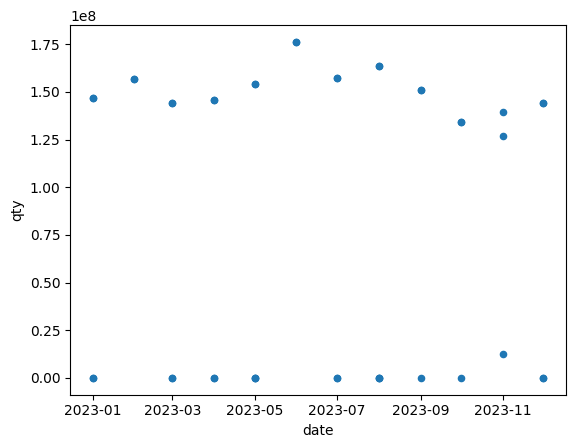

In [220]:
import matplotlib.pyplot as plt
preview_df['date'] = pd.to_datetime(preview_df['period'], format='%Y%m')
y_names = ['qty']
x_name = 'date'
fig, ax = plt.subplots(1,1)
for y_name in y_names:
    ax = preview_df.plot(x=x_name, y=y_name, kind='scatter', ax=ax)

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20231101,2023,11,202311,124,CAN,Canada,X,...,139450000.0,False,0.0,False,None,1.869791e+07,1.869791e+07,0,False,True
1,C,M,20231101,2023,11,202311,124,CAN,Canada,X,...,12700000.0,False,0.0,False,None,1.299058e+06,1.299058e+06,0,False,True
2,C,M,20231101,2023,11,202311,124,CAN,Canada,X,...,126750000.0,False,0.0,False,None,1.739885e+07,1.739885e+07,0,False,True
3,C,M,20231201,2023,12,202312,124,CAN,Canada,X,...,144236122.0,False,0.0,False,None,1.926278e+07,1.926278e+07,0,False,True
4,C,M,20231201,2023,12,202312,124,CAN,Canada,X,...,22724.0,False,0.0,False,None,3.457670e+03,3.457670e+03,0,False,True
5,C,M,20231201,2023,12,202312,124,CAN,Canada,X,...,3398.0,False,0.0,False,None,5.069960e+02,5.069960e+02,0,False,True
6,C,M,20231201,2023,12,202312,124,CAN,Canada,X,...,144210000.0,False,0.0,False,None,1.925882e+07,1.925882e+07,0,False,True


## Obtain dataset

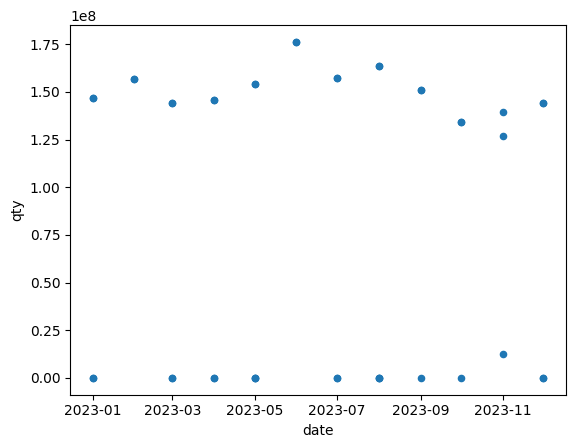

In [220]:
import matplotlib.pyplot as plt
preview_df['date'] = pd.to_datetime(preview_df['period'], format='%Y%m')
y_names = ['qty']
x_name = 'date'
fig, ax = plt.subplots(1,1)
for y_name in y_names:
    ax = preview_df.plot(x=x_name, y=y_name, kind='scatter', ax=ax)

In [ ]:
# obtain data
df = comtradeapicall._getFinalData(
    subscription_key=api_key, 
    typeCode='C', freqCode='A', clCode='HS',
    period=target_periods,
    reporterCode=reporter_code,
    cmdCode=hs_code, flowCode=flow, 
    partnerCode=0, #world/ all partners
    partner2Code=None, customsCode=None,motCode=None,
    breakdownMode='classic', includeDesc=True,
)
df

In [164]:
reporter_code = 124 #cananda
period = '2023'
flow = 'X' # 'M' for Import 'X' for Export
hs_code = '2807'
period_start = '2023-01-01'
period_end = '2023-12-01'

# A list of periods (this is for monthly sets), 
# - this is to optimize the API calls and avoid timeout
periods = pd.date_range(period_start,period_end,freq='MS').strftime("%Y%m").tolist()
target_periods = ",".join(periods)

# obtain data
df = comtradeapicall._getFinalData(
    subscription_key=api_key, 
    typeCode='C', freqCode='A', clCode='HS',
    period=target_periods,
    reporterCode=reporter_code,
    cmdCode=hs_code, flowCode=flow, 
    partnerCode=0, #world/ all partners
    partner2Code=None, customsCode=None,motCode=None,
    breakdownMode='classic', includeDesc=True,
)
df

""


## Testing

In [35]:
#set some variables
from datetime import date
from datetime import timedelta
today = date.today()
yesterday = today - timedelta(days=1)
lastweek = today - timedelta(days=7)

In [41]:
#required
typeCode='C' #C commodity, S services
freqCode='A' #A annual, M monthly
clCode='HS' #Trade (IMTS) classifications: HS, SITC, BEC or EBOPS.

# HS codes : https://www.trade.gov/harmonized-system-hs-codes
# TODO: list them all and fuzzy search using llm
hs_codes = {
    'H2SO4': '2807',
    'NaOH': '281512',
    'Na2SO4': '283311'
}

# A list of periods (this is for monthly sets), 
# - this is to optimize the API calls and avoid timeout
period_start = '2023-01-01'
period_end = '2023-12-01'
periods = pd.date_range(period_start,period_end,freq='MS').strftime("%Y%m").tolist()

In [174]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

# Replace with your actual subscription key
subscription_key = api_key

# Input parameters
countryCodes = ['CAN']
hsCodes = ['2807', '281512']
flow = 'X'  # Export data

# Get the available months for 2023
df_availableperiods = comtradeapicall.getFinalDataAvailability(
    subscription_key=subscription_key,
    typeCode='C',
    freqCode='A',
    clCode='HS',
    reporterCode=comtradeapicall.convertCountryIso3ToCode('CAN'),
    period='2023'
)
df_availableperiods

,datasetCode,typeCode,freqCode,period,reporterCode,reporterISO,reporterDesc,classificationCode,classificationSearchCode,isOriginalClassification,isExtendedFlowCode,isExtendedPartnerCode,isExtendedPartner2Code,isExtendedCmdCode,isExtendedCustomsCode,isExtendedMotCode,totalRecords,datasetChecksum,firstReleased,lastReleased
0,20124202301202100,C,A,2023,124,CAN,Canada,H6,HS,True,True,True,True,True,False,True,7272087,-237051373,2024-02-14T03:31:37.53,2024-04-25T06:28:26.06


In [175]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

# Replace with your actual subscription key
subscription_key = api_key

# Input parameters
countryCodes = ['SWE', 'CAN']
hsCodes = ['2807', '281512']
flow = 'X'  # Export data

# Get the available months for 2023
df_availableperiods = comtradeapicall.getFinalDataAvailability(
    subscription_key=subscription_key,
    typeCode='C',
    freqCode='A',
    clCode='HS',
    reporterCode=comtradeapicall.convertCountryIso3ToCode(','.join(countryCodes)),
    period='2022'
)
df_availableperiods["period"] = df_availableperiods["period"].values.astype(str)
targetPeriod_list = ','.join(sorted(df_availableperiods['period'].tolist()))

# Fetch data for each country and product
data_list = []
for country in countryCodes:
    for hsCode in hsCodes:
        df = comtradeapicall._getFinalData(
            subscription_key,
            typeCode='C',
            freqCode='M',
            clCode='HS',
            period=targetPeriod_list,
            reporterCode=comtradeapicall.convertCountryIso3ToCode(country),
            cmdCode=hsCode,
            flowCode=flow,
            partnerCode=0,
            partner2Code=None,
            customsCode=None,
            motCode=None,
            breakdownMode='classic',
            includeDesc=True
        )
        df['country'] = country
        df['hsCode'] = hsCode
        data_list.append(df)

# Combine all data
df_combined = pd.concat(data_list, ignore_index=True)

# Prepare data for plotting
df_plot = df_combined.pivot_table(
    values='primaryValue', 
    index='period', 
    columns=['country', 'hsCode', 'cmdDesc'],
    aggfunc='first'
)

# Plot the data
fig, ax = plt.subplots(figsize=(15, 10))
for column in df_plot.columns:
    ax.plot(df_plot.index, df_plot[column], label=f"{column[0]} - {column[1]}: {column[2][:20]}...")

ax.set_xlabel('Period')
ax.set_ylabel('Primary Value')
ax.set_title('Export Data for Sweden and Canada (2023)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display the data
print(df_plot)

KeyError: 'primaryValue'

In [155]:
reporter_code = 124 #cananda
period = '2023'
flow = 'X' # 'M' for Import 'X' for Export
hs_codes = {
    'H2SO4': '2807',
    'NaOH': '281512',
    'Na2SO4': '283311'
}

cmd_codes = ",".join(hs_codes.values())

df = comtradeapicall._getFinalData(
    subscription_key=api_key, 
    typeCode='C', freqCode='A', clCode='HS',
    period=period,
    reporterCode=reporter_code,
    cmdCode=cmd_codes, flowCode=flow, 
    partnerCode=0, #world/ all partners
    partner2Code=None, customsCode=None,motCode=None,
    breakdownMode='classic', includeDesc=True,
)
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20230101,2023,52,2023,124,CAN,Canada,X,...,1.813801e+09,False,0.0,False,None,2.779029e+08,2.779029e+08,0,False,True
1,C,A,20230101,2023,52,2023,124,CAN,Canada,X,...,5.275767e+07,False,0.0,False,None,4.231480e+07,4.231480e+07,0,False,True
2,C,A,20230101,2023,52,2023,124,CAN,Canada,X,...,9.219507e+07,False,0.0,False,None,9.867672e+06,9.867672e+06,0,False,True


In [24]:
import requests
from typing import List, Optional

class ComtradeClient:
    def __init__(self, subscription_key: str, base_url: str = "https://comtradeapi.un.org/data/v1"):
        self.base_url = base_url
        self.subscription_key = subscription_key
        self.headers = {
            "Ocp-Apim-Subscription-Key": self.subscription_key
        }

    def get_trade_data(self, type_code: str, freq_code: str, cl_code: str, **kwargs) -> dict:
        """
        Fetch trade data from the Comtrade API.
        """
        endpoint = f"{self.base_url}/get/{type_code}/{freq_code}/{cl_code}"
        params = {k: v for k, v in kwargs.items() if v is not None}
        response = requests.get(endpoint, headers=self.headers, params=params)
        response.raise_for_status()
        return response.json()

    def get_chemical_groups(self, year: str = "2022") -> List[dict]:
        """
        Get a list of chemical groups that have data.
        
        :param year: The year to check for data availability
        :return: List of dictionaries containing chemical group codes and descriptions
        """
        data = self.get_trade_data(
            type_code='C',
            freq_code='A',
            cl_code='HS',
            period=year,
            cmdCode='28,29',  # Inorganic and Organic chemicals
            aggregateBy='cmdCode'
        )
        
        chemical_groups = []
        for record in data.get('data', []):
            chemical_groups.append({
                'code': record.get('cmdCode'),
                'description': record.get('cmdDesc')
            })
        
        return chemical_groups

    def get_countries_with_data(self, year: str = "2022") -> List[dict]:
        """
        Get a list of countries that have trade data.
        
        :param year: The year to check for data availability
        :return: List of dictionaries containing country codes and names
        """
        data = self.get_trade_data(
            type_code='C',
            freq_code='A',
            cl_code='HS',
            period=year,
            aggregateBy='reporterCode'
        )
        
        countries = []
        for record in data.get('data', []):
            countries.append({
                'code': record.get('reporterCode'),
                'name': record.get('reporterDesc')
            })
        
        return countries

    def get_countries_with_chemical_data(self, chemical_code: str, year: str = "2022") -> List[dict]:
        """
        Get a list of countries that have data for a specific chemical.
        
        :param chemical_code: The HS code for the chemical
        :param year: The year to check for data availability
        :return: List of dictionaries containing country codes and names
        """
        data = self.get_trade_data(
            type_code='C',
            freq_code='A',
            cl_code='HS',
            period=year,
            cmdCode=chemical_code,
            aggregateBy='reporterCode'
        )
        
        countries = []
        for record in data.get('data', []):
            countries.append({
                'code': record.get('reporterCode'),
                'name': record.get('reporterDesc')
            })
        
        return countries

In [25]:

client = ComtradeClient(subscription_key=api_key)
# Get chemical groups
chemical_groups = client.get_chemical_groups()
print("Chemical groups with data:")
for group in chemical_groups[:5]:  # Print first 5 for brevity
    print(f"Code: {group['code']}, Description: {group['description']}")

Chemical groups with data:
Code: -2, Description: None
Code: -2, Description: None
Code: -2, Description: None
Code: -2, Description: None
Code: -2, Description: None


In [ ]:
# Get countries with data
countries = client.get_countries_with_data()
print("\nCountries with trade data:")
for country in countries[:5]:  # Print first 5 for brevity
    print(f"Code: {country['code']}, Name: {country['name']}")

In [ ]:
# Usage example
if __name__ == "__main__":
    client = ComtradeClient('YOUR_SUBSCRIPTION_KEY')

    try:
        # Get chemical groups
        chemical_groups = client.get_chemical_groups()
        print("Chemical groups with data:")
        for group in chemical_groups[:5]:  # Print first 5 for brevity
            print(f"Code: {group['code']}, Description: {group['description']}")

        # Get countries with data
        countries = client.get_countries_with_data()
        print("\nCountries with trade data:")
        for country in countries[:5]:  # Print first 5 for brevity
            print(f"Code: {country['code']}, Name: {country['name']}")

        # Get countries with data for sulfuric acid (HS code 2807)
        countries_with_h2so4 = client.get_countries_with_chemical_data('2807')
        print("\nCountries with sulfuric acid (H2SO4) trade data:")
        for country in countries_with_h2so4[:5]:  # Print first 5 for brevity
            print(f"Code: {country['code']}, Name: {country['name']}")

    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

In [23]:
import pandas as pd
df = pd.DataFrame.from_records(data)
df.describe()

,refPeriodId,refYear,refMonth,reporterCode,partnerCode,partner2Code,aggrLevel,motCode,qtyUnitCode,qty,altQtyUnitCode,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue,legacyEstimationFlag
count,203.0,203.0,203.0,203.0,203.000000,203.0,203.000000,203.0,203.000000,2.030000e+02,203.000000,2.030000e+02,1.970000e+02,203.0,6.300000e+01,2.030000e+02,2.030000e+02,203.000000
mean,20220101.0,2022.0,52.0,842.0,402.576355,0.0,5.320197,0.0,7.911330,1.018874e+08,13.201970,6.760108e+07,5.861084e+07,0.0,3.305326e+07,2.955675e+07,3.088954e+07,0.453202
std,0.0,0.0,0.0,0.0,254.407734,0.0,0.949693,0.0,0.891111,5.151318e+08,6.684813,4.539519e+08,2.888054e+08,0.0,9.638930e+07,1.635007e+08,1.656602e+08,1.576915
min,20220101.0,2022.0,52.0,842.0,0.000000,0.0,4.000000,0.0,-1.000000,0.000000e+00,-1.000000,0.000000e+00,6.100000e+01,0.0,8.430000e+02,8.430000e+02,8.430000e+02,0.000000
25%,20220101.0,2022.0,52.0,842.0,179.000000,0.0,4.000000,0.0,8.000000,1.140250e+04,8.000000,3.025000e+02,9.036000e+03,0.0,6.815100e+04,1.381200e+04,1.381200e+04,0.000000
50%,20220101.0,2022.0,52.0,842.0,384.000000,0.0,6.000000,0.0,8.000000,3.290000e+05,8.000000,1.279400e+04,2.910000e+05,0.0,1.527236e+06,2.062110e+05,2.118850e+05,0.000000
75%,20220101.0,2022.0,52.0,842.0,616.000000,0.0,6.000000,0.0,8.000000,1.920010e+07,21.000000,6.257445e+05,1.426889e+07,0.0,1.561728e+07,5.721215e+06,6.462434e+06,0.000000
max,20220101.0,2022.0,52.0,842.0,862.000000,0.0,6.000000,0.0,8.000000,5.617987e+09,21.000000,5.617882e+09,3.205260e+09,0.0,5.193228e+08,2.023439e+09,2.023439e+09,6.000000


Trade data retrieved successfully:
count: 203
[{'typeCode': 'C', 'freqCode': 'A', 'refPeriodId': 20220101, 'refYear': 2022, 'refMonth': 52, 'period': '2022', 'reporterCode': 842, 'reporterISO': 'USA', 'reporterDesc': 'USA', 'flowCode': 'M', 'flowDesc': 'Import', 'partnerCode': 0, 'partnerISO': 'W00', 'partnerDesc': 'World', 'partner2Code': 0, 'partner2ISO': 'W00', 'partner2Desc': 'World', 'classificationCode': 'H6', 'classificationSearchCode': 'HS', 'isOriginalClassification': True, 'cmdCode': '2807', 'cmdDesc': 'Sulphuric acid; oleum', 'aggrLevel': 4, 'isLeaf': False, 'customsCode': 'C00', 'customsDesc': 'TOTAL CPC', 'mosCode': '0', 'motCode': 0, 'motDesc': 'TOTAL MOT', 'qtyUnitCode': 8, 'qtyUnitAbbr': 'kg', 'qty': 3205260000.0, 'isQtyEstimated': False, 'altQtyUnitCode': 21, 'altQtyUnitAbbr': '1000 KG', 'altQty': 3205260.0, 'isAltQtyEstimated': False, 'netWgt': 3205260000.0, 'isNetWgtEstimated': False, 'grossWgt': 0.0, 'isGrossWgtEstimated': False, 'cifvalue': 510821146.0, 'fobvalue':